### **TP4**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import pandas as pd
import copy

# Entrena clasificadores/regresores de k-nn, para una lista de k vecinos,
# midiendo el error en train, validación y test al terminar ese paso de
# entrenamiento. Devuelve el mejor clasificador/regresor, la lista de los
# errores de train, la lista de los errores de validación y la lista de los
# errores de test
def entrenar_knn(X_train, y_train, X_val, y_val, X_test, y_test, ks,
                 w = 'uniform', isClassif = True):
  error_train = []
  error_val = []
  error_test = []
  clasificadores = []

  for k in ks:
    # Clasificación
    if isClassif:
      clf = KNeighborsClassifier(n_neighbors = k, weights = w)
    # Regresión
    else:
      clf = KNeighborsRegressor(n_neighbors = k, weights = w)

    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_val_pred = clf.predict(X_val)
    y_test_pred = clf.predict(X_test)

    # Para clasificación usamos el error de clasificación
    if isClassif:
      e_train = zero_one_loss(y_train, y_train_pred)
      e_val = zero_one_loss(y_val, y_val_pred)
      e_test = zero_one_loss(y_test, y_test_pred)
    # Para regresión usamos el error cuadrático medio
    else:
      e_train = mean_squared_error(y_train, y_train_pred)
      e_val = mean_squared_error(y_val, y_val_pred)
      e_test = mean_squared_error(y_test, y_test_pred)

    error_train += [e_train]
    error_val += [e_val]
    error_test += [e_test]
    clasificadores += [copy.deepcopy(clf)]

  # Guardo el índice en que se encuentra el menor error de validación
  i = error_val.index(min(error_val))
  # Y lo uso para elegir el mejor clasificador
  best_clasif = clasificadores[i]

  return best_clasif, error_train, error_val, error_test

**Ejercicio a)**

In [ ]:
# El parámetro n indica el dataset a utilizar
def ej1(n):
  df = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/TP4/'
                   'Datasets/espirales_con_ruido/c_' + n + '.data',
                   header = None)
  X = df[df.columns[:-1]]
  y = df[df.columns[-1]]
  X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8,
                                                    random_state = 0)

  df = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/TP4/'
                   'Datasets/espirales_con_ruido/c_' + n + '.test',
                   header = None)
  X_test = df[df.columns[:-1]]
  y_test = df[df.columns[-1]]

  return X_train, y_train, X_val, y_val, X_test, y_test

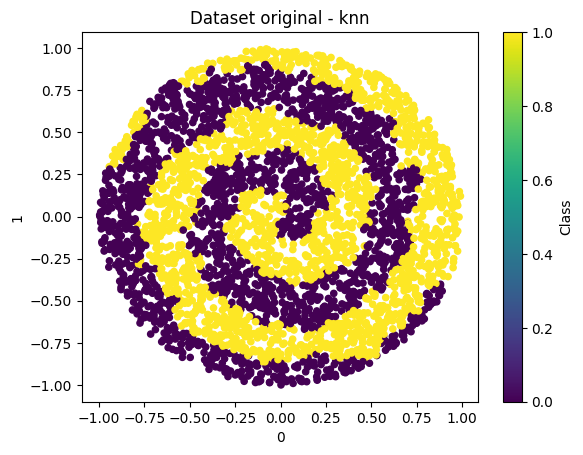

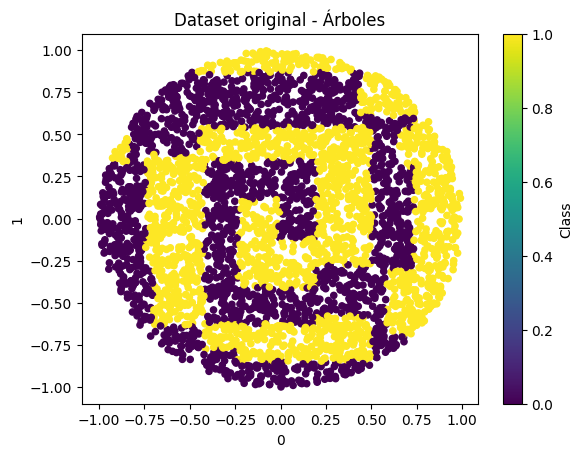

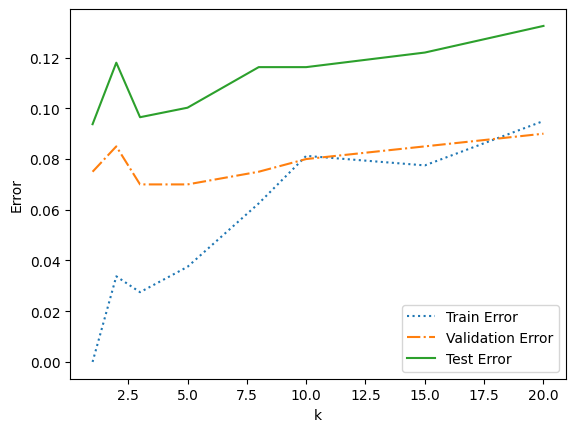

In [ ]:
ks = [1,2,3,5,8,10,15,20]

# Dataset original
X_train, y_train, X_val, y_val, X_test, y_test = ej1('0')
clf, e_train, e_val, e_test = entrenar_knn(X_train, y_train, X_val, y_val,
                                           X_test, y_test, ks)

# Grafico predicciones knn
y_pred = clf.predict(X_test)
pred = copy.copy(X_test)
pred['Class'] = y_pred
pred.plot(x = 0, y = 1, kind = 'scatter', c = 'Class', colormap = 'viridis',
          title = 'Dataset original - knn')
plt.show()

# Grafico predicciones árboles
clf = DecisionTreeClassifier(criterion = 'entropy',
                             min_impurity_decrease = 0.005, random_state = 0,
                             min_samples_leaf = 5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
pred = copy.copy(X_test)
pred['Class'] = y_pred
pred.plot(x = 0, y = 1, kind = 'scatter', c = 'Class', colormap = 'viridis',
          title = 'Dataset original - Árboles')
plt.show()

# Grafico errores
plt.plot(ks, e_train, linestyle = ':')
plt.plot(ks, e_val, linestyle = '-.')
plt.plot(ks, e_test, linestyle = '-')

plt.xlabel('k')
plt.ylabel('Error')
plt.legend(['Train Error', 'Validation Error', 'Test Error'])

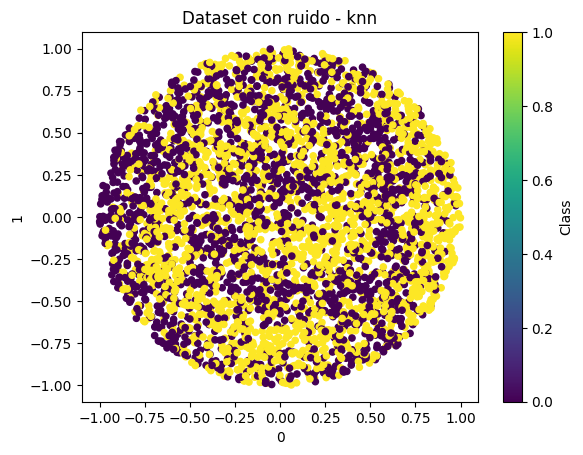

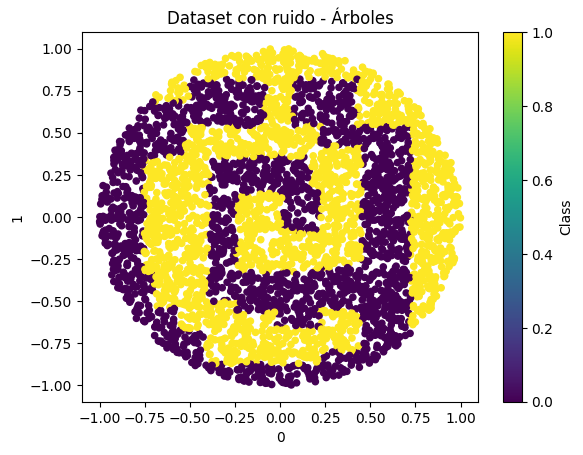

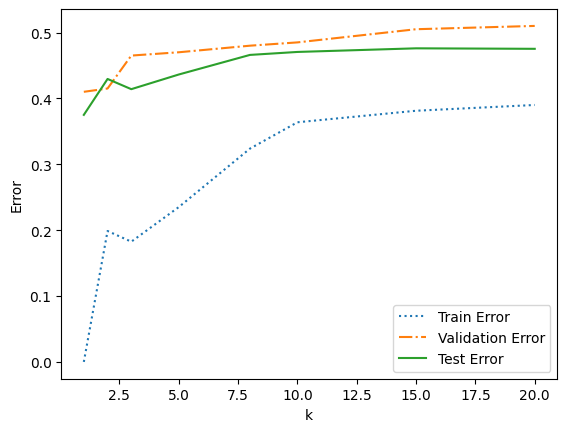

In [ ]:
# Dataset con ruido
X_train, y_train, X_val, y_val, X_test, y_test = ej1('2')
clf, e_train, e_val, e_test = entrenar_knn(X_train, y_train, X_val, y_val,
                                           X_test, y_test, ks)

# Grafico predicciones knn
y_pred = clf.predict(X_test)
pred = copy.copy(X_test)
pred['Class'] = y_pred
pred.plot(x = 0, y = 1, kind = 'scatter', c = 'Class', colormap = 'viridis',
          title = 'Dataset con ruido - knn')
plt.show()

# Grafico predicciones árboles
clf = DecisionTreeClassifier(criterion = 'entropy',
                             min_impurity_decrease = 0.005, random_state = 0,
                             min_samples_leaf = 5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
pred = copy.copy(X_test)
pred['Class'] = y_pred
pred.plot(x = 0, y = 1, kind = 'scatter', c = 'Class', colormap = 'viridis',
          title = 'Dataset con ruido - Árboles')
plt.show()

# Grafico errores
plt.plot(ks, e_train, linestyle = ':')
plt.plot(ks, e_val, linestyle = '-.')
plt.plot(ks, e_test, linestyle = '-')

plt.xlabel('k')
plt.ylabel('Error')
plt.legend(['Train Error', 'Validation Error', 'Test Error'])

Se puede apreciar, tanto en las gráficas de las predicciones hechas por el clasificador como en las de errores, que nuestro modelo no es resistente al ruido.

Para el dataset original, se obtuvieron buenos resultados, con errores mínimos de alrededor de 9%, el cual aumenta cuando se elige una mayor cantidad de vecinos. Esto se ve reflejado en la gráfica de las predicciones, en la cual se pueden apreciar las espirales, aunque con algunos puntos cercanos a los bordes mal clasificados. Esto último se debe a que hay más vecinos de puntos de la otra clase en las fronteras de las espirales. Este problema no ocurre en el interior de las espirales, donde todos los puntos van a estar bien clasificados.

En el caso del dataset con ruido, el error es muy alto, alcanzando valores cercanos a 0.5. En la gráfica de predicciones pareciera que los puntos fueron clasificados al azar, y no se pueden apreciar las espirales.

Para el caso de los árboles, si bien en ambos modelos las predicciones no resultaron muy buenas, no pareciera afectarles tanto el ruido.

**Ejercicio b)**

In [ ]:
import sklearn as sk
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import zero_one_loss

# Dada una lista de conjuntos de entrenamiento y un conjunto de test, entrena
# árboles y calcula los promedios de los errores de train y de test
def errorsTrees(dfs, df_test):
  X_test = df_test[df_test.columns[:-1]]
  y_test = df_test[df_test.columns[-1]]

  trainErrorRates = []
  testErrorRates = []

  for df in dfs:
    X_train = df[df.columns[:-1]]
    y_train = df[df.columns[-1]]
    clf = DecisionTreeClassifier(criterion = 'entropy',
                                 min_impurity_decrease = 0.005,
                                 random_state = 0, min_samples_leaf = 5)
    clf.fit(X_train, y_train)
    trainErrorRates += [zero_one_loss(y_train, clf.predict(X_train))]
    testErrorRates += [zero_one_loss(y_test, clf.predict(X_test))]

  trainErrorMean = mean(trainErrorRates)
  testErrorMean = mean(testErrorRates)
  return trainErrorMean, testErrorMean

# Dada una lista de conjuntos de entrenamiento y un conjunto de test, entrena
# redes y calcula los promedios de los errores de train y de test
def errorsRedes(dfs, df_test):
  eta = 0.1       # Learning rate
  alfa = 0.5      # Momentum
  epocas = 20     # Número de épocas que entrena cada vez
  N2 = 6          # Cantidad de neuronas en la capa intermedia

  evaluaciones = 200

  X_test = df_test[df_test.columns[:-1]]
  y_test = df_test[df_test.columns[-1]]

  trainErrorRates = []
  testErrorRates = []

  for df in dfs:
    X_train = df[df.columns[:-1]]
    y_train = df[df.columns[-1]]

    clasif = MLPClassifier(hidden_layer_sizes = (N2,), activation = 'logistic',
                           solver = 'sgd', alpha = 0.0, batch_size = 1,
                           learning_rate = 'constant', learning_rate_init = eta,
                           momentum = alfa, nesterovs_momentum = False,
                           tol = 0.0, warm_start = True, max_iter = epocas)

    for i in range(evaluaciones):
      clasif.fit(X_train, y_train)
      y_train_pred = clasif.predict(X_train)
      y_test_pred = clasif.predict(X_test)

      e_train = zero_one_loss(y_train, y_train_pred)
      e_test = zero_one_loss(y_test, y_test_pred)

      trainErrorRates += [e_train]
      testErrorRates += [e_test]

  trainErrorMean = mean(trainErrorRates)
  testErrorMean = mean(testErrorRates)

  return trainErrorMean, testErrorMean

# Dada una lista de conjuntos de entrenamiento y un conjunto de test, entrena
# clasificadores Naive Bayes y calcula los promedios de los errores de train y
# de test
def errorsBayes(dfs, df_test):
  X_test = df_test[df_test.columns[:-1]]
  y_test = df_test[df_test.columns[-1]]

  trainErrorRates = []
  testErrorRates = []

  for df in dfs:
    X_train = df[df.columns[:-1]]
    y_train = df[df.columns[-1]]

    clf = GaussianNB()
    clf.fit(X_train, y_train)
    trainErrorRates += [zero_one_loss(y_train, clf.predict(X_train))]
    testErrorRates += [zero_one_loss(y_test, clf.predict(X_test))]

  trainErrorMean = mean(trainErrorRates)
  testErrorMean = mean(testErrorRates)
  return trainErrorMean, testErrorMean

# Dada una lista de conjuntos de entrenamiento y un conjunto de test, entrena
# clasificadores de k-nn y calcula los promedios de los errores de train y
# de test
def errorsKnn(dfs, df_test, ks, w = 'uniform'):
  X_test = df_test[df_test.columns[:-1]]
  y_test = df_test[df_test.columns[-1]]

  trainErrorRates = []
  testErrorRates = []

  for df in dfs:
    X = df[df.columns[:-1]]
    y = df[df.columns[-1]]
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8,
                                                      random_state = 0)

    clf, _, _, _ = entrenar_knn(X_train, y_train, X_val, y_val, X_test, y_test,
                                ks, w)
    clf.fit(X_train, y_train)
    trainErrorRates += [zero_one_loss(y_train, clf.predict(X_train))]
    testErrorRates += [zero_one_loss(y_test, clf.predict(X_test))]

  trainErrorMean = mean(trainErrorRates)
  testErrorMean = mean(testErrorRates)
  return trainErrorMean, testErrorMean

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt, ceil, pi
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import zero_one_loss
from statistics import mean

# Usada por los ítems a) y b). Genera un dataframe a partir de los parámetros
# recibidos
def generate_dataframe(d, n, C, center0, center1, diag):
  # Cantidad de puntos d-dimensionales a generar para la clase 0
  size0 = ceil(n / 2)
  # Cantidad de puntos d-dimensionales a generar para la clase 1
  size1 = n // 2

  # Genero los puntos de la clase 0
  class0 = np.random.multivariate_normal(center0, diag, size0)
  # Y luego los de la clase 1
  class1 = np.random.multivariate_normal(center1, diag, size1)

  # Concateno los puntos generados en un solo array
  data = np.concatenate((class0, class1))
  # Genero las columnas que van a representar las coordenadas de cada punto
  col = list(range(d))

  # Genero el dataframe
  df = pd.DataFrame(data, columns = col)

  # Genero la columna correspondiente a la clase a la que pertenece cada punto
  classes = [0] * size0 + [1] * size1
  # Y la agrego al dataframe
  df['Class'] = classes

  return df

# Ítem a)
def diagonal(d, n, C):
  # Genero los centros para ambas clases
  center0 = [-1] * d
  center1 = [1] * d
  # Y la matriz de covarianza diagonal
  diag = np.diag([(C * sqrt(d)) ** 2] * d)

  # Genero y devuelvo el dataframe
  return generate_dataframe(d, n, C, center0, center1, diag)

# Ítem b)
def parallel(d, n, C):
  # Genero los centros para ambas clases
  center0 = [-1] + [0] * (d - 1)
  center1 = [1] + [0] * (d - 1)
  # Y la matriz de covarianza diagonal
  diag = np.diag([C ** 2] * d)

  # Genero y devuelvo el dataframe
  return generate_dataframe(d, n, C, center0, center1, diag)

In [ ]:
# Genera 20 dataframes "diagonal" y 20 dataframes "paralelo" a partir de los
# parámetros recibidos
def generate_train(d,n,C):
  diags = []
  parals = []

  for i in range(20):
    diag = diagonal(d,n,C)
    paral = parallel(d,n,C)
    diags += [diag]
    parals += [paral]

  return diags, parals

# Genera un dataframe para usar como conjunto de test
def generate_test(d,C):
  n = 10000
  diag = diagonal(d,n,C)
  paral = parallel(d,n,C)

  return diag, paral

In [ ]:
C = 0.78
n = 250

#Genero los conjuntos de entrenamiento

# d = 2
df1_Diag, df1_Paral = generate_train(2,n,C)
test1_Diag, test1_Paral = generate_test(2,C)

# d = 4
df2_Diag, df2_Paral = generate_train(4,n,C)
test2_Diag, test2_Paral = generate_test(4,C)

# d = 8
df3_Diag, df3_Paral = generate_train(8,n,C)
test3_Diag, test3_Paral = generate_test(8,C)

# d = 16
df4_Diag, df4_Paral = generate_train(16,n,C)
test4_Diag, test4_Paral = generate_test(16,C)

# d = 32
df5_Diag, df5_Paral = generate_train(32,n,C)
test5_Diag, test5_Paral = generate_test(32,C)

In [ ]:
# Calculo los errores de los árboles

# Diagonal

# d = 2
e_train1_Diag_Trees, e_test1_Diag_Trees = errorsTrees(df1_Diag, test1_Diag)
# d = 4
e_train2_Diag_Trees, e_test2_Diag_Trees = errorsTrees(df2_Diag, test2_Diag)
# d = 8
e_train3_Diag_Trees, e_test3_Diag_Trees = errorsTrees(df3_Diag, test3_Diag)
# d = 16
e_train4_Diag_Trees, e_test4_Diag_Trees = errorsTrees(df4_Diag, test4_Diag)
# d = 32
e_train5_Diag_Trees, e_test5_Diag_Trees = errorsTrees(df5_Diag, test5_Diag)

# Y los agrupo en listas
e_train_Diag_Trees = [e_train1_Diag_Trees, e_train2_Diag_Trees,
                      e_train3_Diag_Trees, e_train4_Diag_Trees,
                      e_train5_Diag_Trees]
e_test_Diag_Trees = [e_test1_Diag_Trees, e_test2_Diag_Trees, e_test3_Diag_Trees,
                     e_test4_Diag_Trees, e_test5_Diag_Trees]

# Paralelo

# d = 2
e_train1_Paral_Trees, e_test1_Paral_Trees = errorsTrees(df1_Paral, test1_Paral)
# d = 4
e_train2_Paral_Trees, e_test2_Paral_Trees = errorsTrees(df2_Paral, test2_Paral)
# d = 8
e_train3_Paral_Trees, e_test3_Paral_Trees = errorsTrees(df3_Paral, test3_Paral)
# d = 16
e_train4_Paral_Trees, e_test4_Paral_Trees = errorsTrees(df4_Paral, test4_Paral)
# d = 32
e_train5_Paral_Trees, e_test5_Paral_Trees = errorsTrees(df5_Paral, test5_Paral)

# Y los agrupo en listas
e_train_Paral_Trees = [e_train1_Paral_Trees, e_train2_Paral_Trees,
                       e_train3_Paral_Trees, e_train4_Paral_Trees,
                       e_train5_Paral_Trees]
e_test_Paral_Trees = [e_test1_Paral_Trees, e_test2_Paral_Trees,
                      e_test3_Paral_Trees, e_test4_Paral_Trees,
                      e_test5_Paral_Trees]

In [ ]:
import pandas as pd

# Calculo los errores de las redes

# Diagonal

# d = 2
df1_Diag_Redes = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/'
                             'TP3/df1_Diag_Redes.csv')
e_train1_Diag_Redes, e_test1_Diag_Redes = df1_Diag_Redes.iloc[:, 0]
# d = 4
df2_Diag_Redes = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/'
                             'TP3/df2_Diag_Redes.csv')
e_train2_Diag_Redes, e_test2_Diag_Redes = df2_Diag_Redes.iloc[:, 0]
# d = 8
df3_Diag_Redes = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/'
                             'TP3/df3_Diag_Redes.csv')
e_train3_Diag_Redes, e_test3_Diag_Redes = df3_Diag_Redes.iloc[:, 0]
# d = 16
df4_Diag_Redes = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/'
                             'TP3/df4_Diag_Redes.csv')
e_train4_Diag_Redes, e_test4_Diag_Redes = df4_Diag_Redes.iloc[:, 0]
# d = 32
df5_Diag_Redes = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/'
                             'TP3/df5_Diag_Redes.csv')
e_train5_Diag_Redes, e_test5_Diag_Redes = df5_Diag_Redes.iloc[:, 0]

# Y los agrupo en listas
e_train_Diag_Redes = [e_train1_Diag_Redes, e_train2_Diag_Redes,
                      e_train3_Diag_Redes, e_train4_Diag_Redes,
                      e_train5_Diag_Redes]
e_test_Diag_Redes = [e_test1_Diag_Redes, e_test2_Diag_Redes, e_test3_Diag_Redes,
                     e_test4_Diag_Redes, e_test5_Diag_Redes]

# Paralelo

# d = 2
df1_Paral_Redes = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/'
                             'TP3/df1_Paral_Redes.csv')
e_train1_Paral_Redes, e_test1_Paral_Redes = df1_Paral_Redes.iloc[:, 0]
# d = 4
df2_Paral_Redes = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/'
                             'TP3/df2_Paral_Redes.csv')
e_train2_Paral_Redes, e_test2_Paral_Redes = df2_Paral_Redes.iloc[:, 0]
# d = 8
df3_Paral_Redes = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/'
                             'TP3/df3_Paral_Redes.csv')
e_train3_Paral_Redes, e_test3_Paral_Redes = df3_Paral_Redes.iloc[:, 0]
# d = 16
df4_Paral_Redes = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/'
                             'TP3/df4_Paral_Redes.csv')
e_train4_Paral_Redes, e_test4_Paral_Redes = df4_Paral_Redes.iloc[:, 0]
# d = 32
df5_Paral_Redes = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/'
                             'TP3/df5_Paral_Redes.csv')
e_train5_Paral_Redes, e_test5_Paral_Redes = df5_Paral_Redes.iloc[:, 0]

# Y los agrupo en listas
e_train_Paral_Redes = [e_train1_Paral_Redes, e_train2_Paral_Redes,
                      e_train3_Paral_Redes, e_train4_Paral_Redes,
                      e_train5_Paral_Redes]
e_test_Paral_Redes = [e_test1_Paral_Redes, e_test2_Paral_Redes,
                      e_test3_Paral_Redes, e_test4_Paral_Redes,
                      e_test5_Paral_Redes]

In [ ]:
# Calculo los errores de los clasificadores Naive Bayes

# Diagonal

# d = 2
e_train1_Diag_Bayes, e_test1_Diag_Bayes = errorsBayes(df1_Diag, test1_Diag)
# d = 4
e_train2_Diag_Bayes, e_test2_Diag_Bayes = errorsBayes(df2_Diag, test2_Diag)
# d = 8
e_train3_Diag_Bayes, e_test3_Diag_Bayes = errorsBayes(df3_Diag, test3_Diag)
# d = 16
e_train4_Diag_Bayes, e_test4_Diag_Bayes = errorsBayes(df4_Diag, test4_Diag)
# d = 32
e_train5_Diag_Bayes, e_test5_Diag_Bayes = errorsBayes(df5_Diag, test5_Diag)

# Y los agrupo en listas
e_train_Diag_Bayes = [e_train1_Diag_Bayes, e_train2_Diag_Bayes,
                      e_train3_Diag_Bayes, e_train4_Diag_Bayes,
                      e_train5_Diag_Bayes]
e_test_Diag_Bayes = [e_test1_Diag_Bayes, e_test2_Diag_Bayes, e_test3_Diag_Bayes,
                     e_test4_Diag_Bayes, e_test5_Diag_Bayes]

# Paralelo

# d = 2
e_train1_Paral_Bayes, e_test1_Paral_Bayes = errorsBayes(df1_Paral, test1_Paral)
# d = 4
e_train2_Paral_Bayes, e_test2_Paral_Bayes = errorsBayes(df2_Paral, test2_Paral)
# d = 8
e_train3_Paral_Bayes, e_test3_Paral_Bayes = errorsBayes(df3_Paral, test3_Paral)
# d = 16
e_train4_Paral_Bayes, e_test4_Paral_Bayes = errorsBayes(df4_Paral, test4_Paral)
# d = 32
e_train5_Paral_Bayes, e_test5_Paral_Bayes = errorsBayes(df5_Paral, test5_Paral)

# Y los agrupo en listas
e_train_Paral_Bayes = [e_train1_Paral_Bayes, e_train2_Paral_Bayes,
                       e_train3_Paral_Bayes, e_train4_Paral_Bayes,
                       e_train5_Paral_Bayes]
e_test_Paral_Bayes = [e_test1_Paral_Bayes, e_test2_Paral_Bayes,
                      e_test3_Paral_Bayes, e_test4_Paral_Bayes,
                      e_test5_Paral_Bayes]

In [ ]:
# Calculo los errores de los clasificadores k-nn

k1 = [1]
ks = [k for k in range(2, 16)]

# Diagonal

# d = 2
e_train1_Diag_K1, e_test1_Diag_K1 = errorsKnn(df1_Diag, test1_Diag, k1)
e_train1_Diag_KOpt, e_test1_Diag_KOpt = errorsKnn(df1_Diag, test1_Diag, ks)
# d = 4
e_train2_Diag_K1, e_test2_Diag_K1 = errorsKnn(df2_Diag, test2_Diag, k1)
e_train2_Diag_KOpt, e_test2_Diag_KOpt = errorsKnn(df2_Diag, test2_Diag, ks)
# d = 8
e_train3_Diag_K1, e_test3_Diag_K1 = errorsKnn(df3_Diag, test3_Diag, k1)
e_train3_Diag_KOpt, e_test3_Diag_KOpt = errorsKnn(df3_Diag, test3_Diag, ks)
# d = 16
e_train4_Diag_K1, e_test4_Diag_K1 = errorsKnn(df4_Diag, test4_Diag, k1)
e_train4_Diag_KOpt, e_test4_Diag_KOpt = errorsKnn(df4_Diag, test4_Diag, ks)
# d = 32
e_train5_Diag_K1, e_test5_Diag_K1 = errorsKnn(df5_Diag, test5_Diag, k1)
e_train5_Diag_KOpt, e_test5_Diag_KOpt = errorsKnn(df5_Diag, test5_Diag, ks)

# Y los agrupo en listas
e_train_Diag_K1 = [e_train1_Diag_K1, e_train2_Diag_K1, e_train3_Diag_K1,
                   e_train4_Diag_K1, e_train5_Diag_K1]
e_test_Diag_K1 = [e_test1_Diag_K1, e_test2_Diag_K1, e_test3_Diag_K1,
                  e_test4_Diag_K1, e_test5_Diag_K1]

e_train_Diag_KOpt = [e_train1_Diag_KOpt, e_train2_Diag_KOpt, e_train3_Diag_KOpt,
                     e_train4_Diag_KOpt, e_train5_Diag_KOpt]
e_test_Diag_KOpt = [e_test1_Diag_KOpt, e_test2_Diag_KOpt, e_test3_Diag_KOpt,
                    e_test4_Diag_KOpt, e_test5_Diag_KOpt]

# Paralelo

# d = 2
e_train1_Paral_K1, e_test1_Paral_K1 = errorsKnn(df1_Paral, test1_Paral, k1)
e_train1_Paral_KOpt, e_test1_Paral_KOpt = errorsKnn(df1_Paral, test1_Paral, ks)
# d = 4
e_train2_Paral_K1, e_test2_Paral_K1 = errorsKnn(df2_Paral, test2_Paral, k1)
e_train2_Paral_KOpt, e_test2_Paral_KOpt = errorsKnn(df2_Paral, test2_Paral, ks)
# d = 8
e_train3_Paral_K1, e_test3_Paral_K1 = errorsKnn(df3_Paral, test3_Paral, k1)
e_train3_Paral_KOpt, e_test3_Paral_KOpt = errorsKnn(df3_Paral, test3_Paral, ks)
# d = 16
e_train4_Paral_K1, e_test4_Paral_K1 = errorsKnn(df4_Paral, test4_Paral, k1)
e_train4_Paral_KOpt, e_test4_Paral_KOpt = errorsKnn(df4_Paral, test4_Paral, ks)
# d = 32
e_train5_Paral_K1, e_test5_Paral_K1 = errorsKnn(df5_Paral, test5_Paral, k1)
e_train5_Paral_KOpt, e_test5_Paral_KOpt = errorsKnn(df5_Paral, test5_Paral, ks)

# Y los agrupo en listas
e_train_Paral_K1 = [e_train1_Paral_K1, e_train2_Paral_K1, e_train3_Paral_K1,
                    e_train4_Paral_K1, e_train5_Paral_K1]
e_test_Paral_K1 = [e_test1_Paral_K1, e_test2_Paral_K1, e_test3_Paral_K1,
                   e_test4_Paral_K1, e_test5_Paral_K1]

e_train_Paral_KOpt = [e_train1_Paral_KOpt, e_train2_Paral_KOpt,
                      e_train3_Paral_KOpt, e_train4_Paral_KOpt,
                      e_train5_Paral_KOpt]
e_test_Paral_KOpt = [e_test1_Paral_KOpt, e_test2_Paral_KOpt, e_test3_Paral_KOpt,
                     e_test4_Paral_KOpt, e_test5_Paral_KOpt]

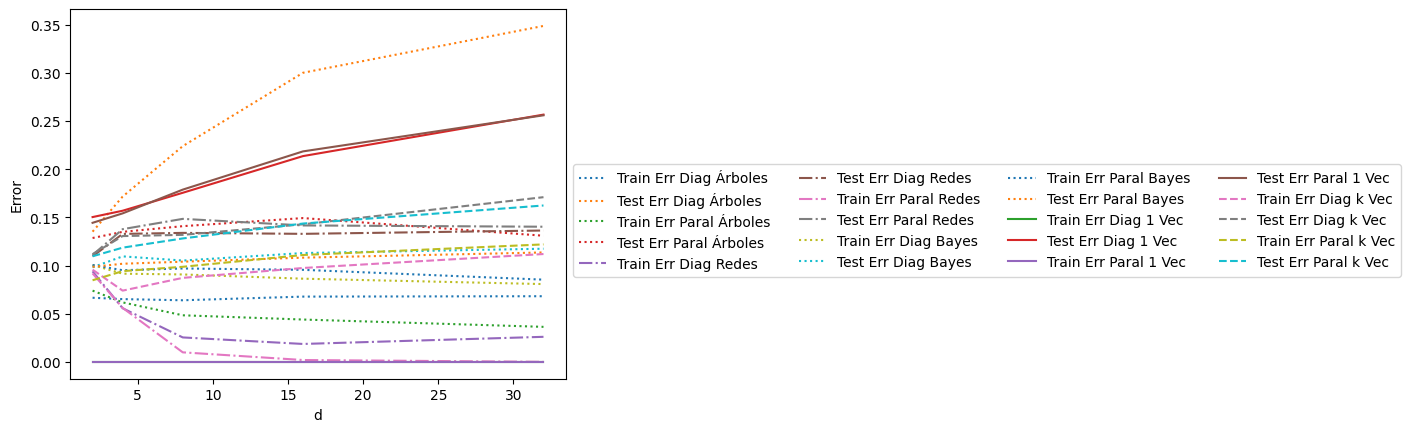

In [ ]:
# Grafico

d = [2, 4, 8, 16, 32]

# Diagonal árboles
plt.plot(d, e_train_Diag_Trees, linestyle = ':')
plt.plot(d, e_test_Diag_Trees, linestyle = ':')

# Paralelo árboles
plt.plot(d, e_train_Paral_Trees, linestyle = ':')
plt.plot(d, e_test_Paral_Trees, linestyle = ':')

# Diagonal redes
plt.plot(d, e_train_Diag_Redes, linestyle = '-.')
plt.plot(d, e_test_Diag_Redes, linestyle = '-.')

# Paralelo redes
plt.plot(d, e_train_Paral_Redes, linestyle = '-.')
plt.plot(d, e_test_Paral_Redes, linestyle = '-.')

# Diagonal Bayes
plt.plot(d, e_train_Diag_Bayes, linestyle = ':')
plt.plot(d, e_test_Diag_Bayes, linestyle = ':')

# Paralelo Bayes
plt.plot(d, e_train_Paral_Bayes, linestyle = ':')
plt.plot(d, e_test_Paral_Bayes, linestyle = ':')

# Diagonal 1 vecino
plt.plot(d, e_train_Diag_K1, linestyle = '-')
plt.plot(d, e_test_Diag_K1, linestyle = '-')

# Paralelo 1 vecino
plt.plot(d, e_train_Paral_K1, linestyle = '-')
plt.plot(d, e_test_Paral_K1, linestyle = '-')

# Diagonal k vecinos
plt.plot(d, e_train_Diag_KOpt, linestyle = '--')
plt.plot(d, e_test_Diag_KOpt, linestyle = '--')

# Paralelo k vecinos
plt.plot(d, e_train_Paral_KOpt, linestyle = '--')
plt.plot(d, e_test_Paral_KOpt, linestyle = '--')

# Etiquetas
plt.xlabel('d')
plt.ylabel('Error')
plt.legend(['Train Err Diag Árboles', 'Test Err Diag Árboles',
            'Train Err Paral Árboles', 'Test Err Paral Árboles',
            'Train Err Diag Redes', 'Test Err Diag Redes',
            'Train Err Paral Redes', 'Test Err Paral Redes',
            'Train Err Diag Bayes', 'Test Err Diag Bayes',
            'Train Err Paral Bayes', 'Test Err Paral Bayes',
            'Train Err Diag 1 Vec', 'Test Err Diag 1 Vec',
            'Train Err Paral 1 Vec', 'Test Err Paral 1 Vec',
            'Train Err Diag k Vec', 'Test Err Diag k Vec',
            'Train Err Paral k Vec', 'Test Err Paral k Vec'],
           bbox_to_anchor = (1.0, 0.5, 0.1, 0.1), ncols = 4)

Podemos observar que tanto para el problema paralelo como para el diagonal, y eligiendo 1 vecino y k vecinos (cantidad óptima), el error
de test crece al aumentar las dimensiones.

Para 1 vecino, el error de test fue mayor al obtenido para los demás clasificadores, excepto para el problema diagonal, para el cual los árboles de decisión dieron peores resultados. Respecto al error de entrenamiento, para ambos problemas fue de 0, dando sobreajuste.

Por otro lado, para el k óptimo encontrado los errores fueron similares a los que dieron las redes neuronales, y el error del problema paralelo fue similar al de árboles. Respecto al error de entrenamiento, para ambos problemas fue cercano a 0.1.

**Ejercicio c)**

In [ ]:
def ej3():
  ks = [k for k in range(1, 51)]
  w = 'distance'

  # Dataframe de test para el problema "diagonal"
  X_test = test5_Diag[test5_Diag.columns[:-1]]
  y_test = test5_Diag[test5_Diag.columns[-1]]

  # Elijo el primer dataframe de train, de la lista de 20 generados en el punto
  # anterior
  df = df5_Diag[0]
  X = df[df.columns[:-1]]
  y = df[df.columns[-1]]
  X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8,
                                                    random_state = 0)

  # Calculo los errores para la lista de vecinos dada
  _, e_train_d, e_val_d, e_test_d = entrenar_knn(X_train, y_train, X_val, y_val,
                                                 X_test, y_test, ks, w)

  # Dataframe de test para el problema "paralelo"
  X_test = test5_Paral[test5_Paral.columns[:-1]]
  y_test = test5_Paral[test5_Paral.columns[-1]]

  # Elijo el primer dataframe de train, de la lista de 20 generados en el punto
  # anterior
  df = df5_Paral[0]
  X = df[df.columns[:-1]]
  y = df[df.columns[-1]]
  X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8,
                                                    random_state = 0)

  _, e_train_p, e_val_p, e_test_p = entrenar_knn(X_train, y_train, X_val, y_val,
                                                 X_test, y_test, ks, w)

  return e_train_d, e_val_d, e_test_d, e_train_p, e_val_p, e_test_p

Text(0.5, 1.0, 'd = 32')

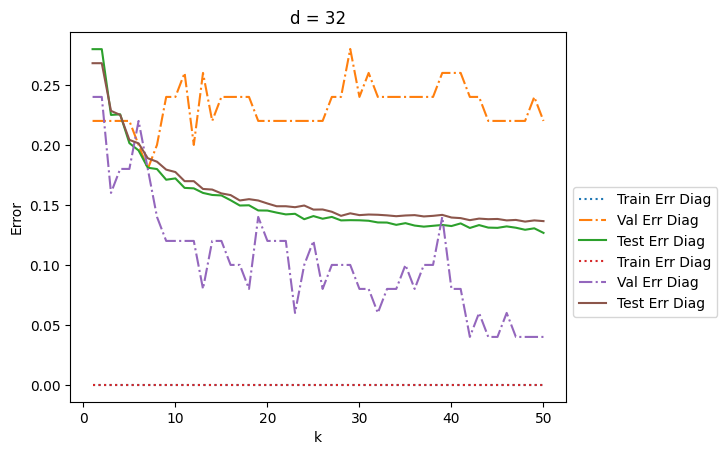

In [ ]:
ks = [k for k in range(1, 51)]

e_train_d, e_val_d, e_test_d, e_train_p, e_val_p, e_test_p = ej3()

# Grafico

plt.plot(ks, e_train_d, linestyle = ':')
plt.plot(ks, e_val_d, linestyle = '-.')
plt.plot(ks, e_test_d, linestyle = '-')

plt.plot(ks, e_train_p, linestyle = ':')
plt.plot(ks, e_val_p, linestyle = '-.')
plt.plot(ks, e_test_p, linestyle = '-')

plt.xlabel('k')
plt.ylabel('Error')
plt.legend(['Train Err Diag', 'Val Err Diag', 'Test Err Diag', 'Train Err Diag',
            'Val Err Diag', 'Test Err Diag'], bbox_to_anchor = (1.0, 0.5, 0.1,
                                                                0.1))
plt.title('d = 32')

In [ ]:
# Calculo los errores de los clasificadores k-nn

k50 = [50]
w = 'distance'

# Diagonal

# d = 2
e_train1_Diag_K50, e_test1_Diag_K50 = errorsKnn(df1_Diag, test1_Diag, k50, w)
e_train1_Diag_KOpt, e_test1_Diag_KOpt = errorsKnn(df1_Diag, test1_Diag, ks, w)
# d = 4
e_train2_Diag_K50, e_test2_Diag_K50 = errorsKnn(df2_Diag, test2_Diag, k50, w)
e_train2_Diag_KOpt, e_test2_Diag_KOpt = errorsKnn(df2_Diag, test2_Diag, ks, w)
# d = 8
e_train3_Diag_K50, e_test3_Diag_K50 = errorsKnn(df3_Diag, test3_Diag, k50, w)
e_train3_Diag_KOpt, e_test3_Diag_KOpt = errorsKnn(df3_Diag, test3_Diag, ks, w)
# d = 16
e_train4_Diag_K50, e_test4_Diag_K50 = errorsKnn(df4_Diag, test4_Diag, k50, w)
e_train4_Diag_KOpt, e_test4_Diag_KOpt = errorsKnn(df4_Diag, test4_Diag, ks, w)
# d = 32
e_train5_Diag_K50, e_test5_Diag_K50 = errorsKnn(df5_Diag, test5_Diag, k50, w)
e_train5_Diag_KOpt, e_test5_Diag_KOpt = errorsKnn(df5_Diag, test5_Diag, ks, w)

# Y los agrupo en listas
e_train_Diag_K50 = [e_train1_Diag_K50, e_train2_Diag_K50, e_train3_Diag_K50,
                   e_train4_Diag_K50, e_train5_Diag_K50]
e_test_Diag_K50 = [e_test1_Diag_K50, e_test2_Diag_K50, e_test3_Diag_K50,
                  e_test4_Diag_K50, e_test5_Diag_K50]

e_train_Diag_KOpt = [e_train1_Diag_KOpt, e_train2_Diag_KOpt, e_train3_Diag_KOpt,
                     e_train4_Diag_KOpt, e_train5_Diag_KOpt]
e_test_Diag_KOpt = [e_test1_Diag_KOpt, e_test2_Diag_KOpt, e_test3_Diag_KOpt,
                    e_test4_Diag_KOpt, e_test5_Diag_KOpt]

# Paralelo

# d = 2
e_train1_Paral_K50, e_test1_Paral_K50 = errorsKnn(df1_Paral, test1_Paral, k50,
                                                  w)
e_train1_Paral_KOpt, e_test1_Paral_KOpt = errorsKnn(df1_Paral, test1_Paral, ks,
                                                    w)
# d = 4
e_train2_Paral_K50, e_test2_Paral_K50 = errorsKnn(df2_Paral, test2_Paral, k50,
                                                  w)
e_train2_Paral_KOpt, e_test2_Paral_KOpt = errorsKnn(df2_Paral, test2_Paral, ks,
                                                    w)
# d = 8
e_train3_Paral_K50, e_test3_Paral_K50 = errorsKnn(df3_Paral, test3_Paral, k50,
                                                  w)
e_train3_Paral_KOpt, e_test3_Paral_KOpt = errorsKnn(df3_Paral, test3_Paral, ks,
                                                    w)
# d = 16
e_train4_Paral_K50, e_test4_Paral_K50 = errorsKnn(df4_Paral, test4_Paral, k50,
                                                  w)
e_train4_Paral_KOpt, e_test4_Paral_KOpt = errorsKnn(df4_Paral, test4_Paral, ks,
                                                    w)
# d = 32
e_train5_Paral_K50, e_test5_Paral_K50 = errorsKnn(df5_Paral, test5_Paral, k50,
                                                  w)
e_train5_Paral_KOpt, e_test5_Paral_KOpt = errorsKnn(df5_Paral, test5_Paral, ks,
                                                    w)

# Y los agrupo en listas
e_train_Paral_K50 = [e_train1_Paral_K50, e_train2_Paral_K50, e_train3_Paral_K50,
                    e_train4_Paral_K50, e_train5_Paral_K50]
e_test_Paral_K50 = [e_test1_Paral_K50, e_test2_Paral_K50, e_test3_Paral_K50,
                   e_test4_Paral_K50, e_test5_Paral_K50]

e_train_Paral_KOpt = [e_train1_Paral_KOpt, e_train2_Paral_KOpt,
                      e_train3_Paral_KOpt, e_train4_Paral_KOpt,
                      e_train5_Paral_KOpt]
e_test_Paral_KOpt = [e_test1_Paral_KOpt, e_test2_Paral_KOpt, e_test3_Paral_KOpt,
                     e_test4_Paral_KOpt, e_test5_Paral_KOpt]

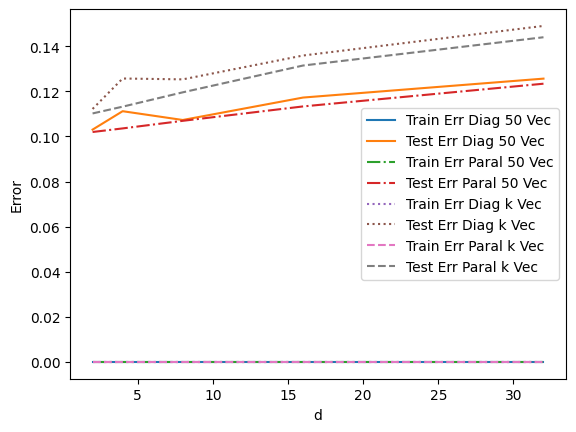

In [ ]:
# Grafico

d = [2, 4, 8, 16, 32]

# Diagonal 50 vecinos
plt.plot(d, e_train_Diag_K50, linestyle = '-')
plt.plot(d, e_test_Diag_K50, linestyle = '-')

# Paralelo 50 vecinos
plt.plot(d, e_train_Paral_K50, linestyle = '-.')
plt.plot(d, e_test_Paral_K50, linestyle = '-.')

# Diagonal k vecinos
plt.plot(d, e_train_Diag_KOpt, linestyle = ':')
plt.plot(d, e_test_Diag_KOpt, linestyle = ':')

# Paralelo k vecinos
plt.plot(d, e_train_Paral_KOpt, linestyle = '--')
plt.plot(d, e_test_Paral_KOpt, linestyle = '--')

# Etiquetas
plt.xlabel('d')
plt.ylabel('Error')
plt.legend(['Train Err Diag 50 Vec', 'Test Err Diag 50 Vec',
            'Train Err Paral 50 Vec', 'Test Err Paral 50 Vec',
            'Train Err Diag k Vec', 'Test Err Diag k Vec',
            'Train Err Paral k Vec', 'Test Err Paral k Vec'])

Usando pesado inverso a la distancia para d = 32, al aumentar la cantidad de vecinos disminuye el error de test para ambos problemas. Además, el error de train se mantuvo siempre en 0, lo cual indica un sobreajuste en el modelo.

Por otro lado, comparando pesos uniformes con el pesado inverso a la distancia, los errores obtenidos fueron similares, aunque éste último dio resultados ligeramente mejores.

**Ejercicio d)**

Sunspots

In [ ]:
def sunspots():
  df = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/TP2/'
                   'Datasets/ssp.data', header = None)
  X = df[df.columns[:-1]]
  y = df[df.columns[-1]]
  X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8,
                                                    random_state = 0)

  df = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/TP2/'
                   'Datasets/ssp.test', header = None)
  X_test = df[df.columns[:-1]]
  y_test = df[df.columns[-1]]

  return X_train, y_train, X_val, y_val, X_test, y_test

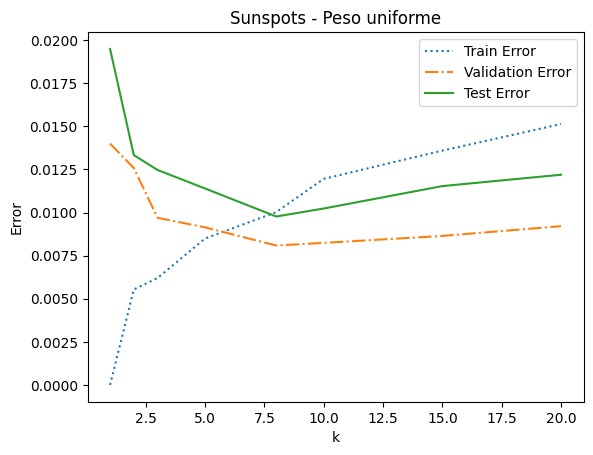

Text(0.5, 1.0, 'Sunspots - Pesado inverso a la distancia')

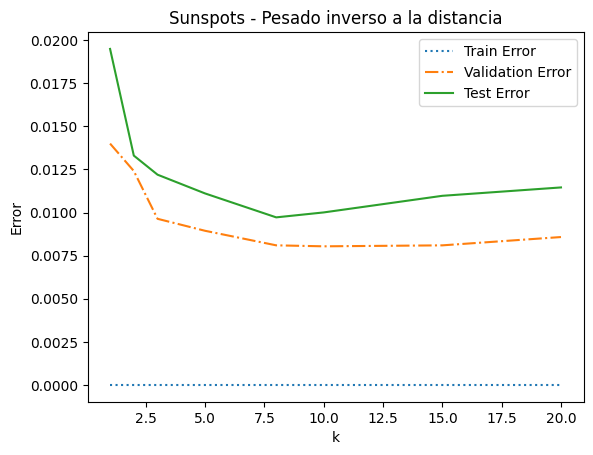

In [ ]:
# Sunspots

ks = [1,2,3,5,8,10,15,20]
w = 'distance'

X_train, y_train, X_val, y_val, X_test, y_test = sunspots()
_, e_train_u, e_val_u, e_test_u = entrenar_knn(X_train, y_train, X_val, y_val,
                                               X_test, y_test, ks,
                                               isClassif = False)

_, e_train_d, e_val_d, e_test_d = entrenar_knn(X_train, y_train, X_val, y_val,
                                               X_test, y_test, ks, w,
                                               isClassif = False)

# Grafico errores pesos uniforme
plt.plot(ks, e_train_u, linestyle = ':')
plt.plot(ks, e_val_u, linestyle = '-.')
plt.plot(ks, e_test_u, linestyle = '-')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend(['Train Error', 'Validation Error', 'Test Error'])
plt.title('Sunspots - Peso uniforme')
plt.show()

# Grafico errores pesado inverso a la distancia
plt.plot(ks, e_train_d, linestyle = ':')
plt.plot(ks, e_val_d, linestyle = '-.')
plt.plot(ks, e_test_d, linestyle = '-')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend(['Train Error', 'Validation Error', 'Test Error'])
plt.title('Sunspots - Pesado inverso a la distancia')

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

def entrenar_red(red, evaluaciones, X_train, y_train, X_test, y_test,
                 X_val = None, y_val = None):
  error_train = []
  error_val = []
  error_test = []

  for i in range(evaluaciones):
    red.fit(X_train, y_train)
    y_train_pred = red.predict(X_train)
    y_test_pred = red.predict(X_test)
    if type(X_val) != type(None):
      y_val_pred = red.predict(X_val)

    e_train = mean_squared_error(y_train, y_train_pred)
    e_test = mean_squared_error(y_test, y_test_pred)
    if type(X_val) != type(None):
      e_val = mean_squared_error(y_val, y_val_pred)

    error_train += [e_train]
    error_test += [e_test]
    if type(X_val) != type(None):
      error_val += [e_val]

  return error_train, error_val, error_test

In [ ]:
def sunspots_redes():
  eta = 0.05      # Learning rate
  alfa = 0.3      # Momentum
  epocas = 20     # Número de épocas que entrena cada vez
  N2 = 6          # Cantidad de neuronas en la capa intermedia

  # Uso el gamma que había resultado mejor en el TP2
  gamma = 10 ** (-6)

  df = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/TP2/'
                   'Datasets/ssp.data', header = None)
  X_train = df[df.columns[:-1]]
  y_train = df[df.columns[-1]]

  df = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/TP2/'
                   'Datasets/ssp.test', header = None)
  X_test = df[df.columns[:-1]]
  y_test = df[df.columns[-1]]

  regr = MLPRegressor(hidden_layer_sizes = (N2,), activation = 'logistic',
                      solver = 'sgd', alpha = gamma, batch_size = 1,
                      learning_rate = 'constant', learning_rate_init = eta,
                      momentum = alfa, nesterovs_momentum = False, tol = 0.0,
                      warm_start = True, max_iter = epocas)

  return regr, X_train, y_train, X_test, y_test

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


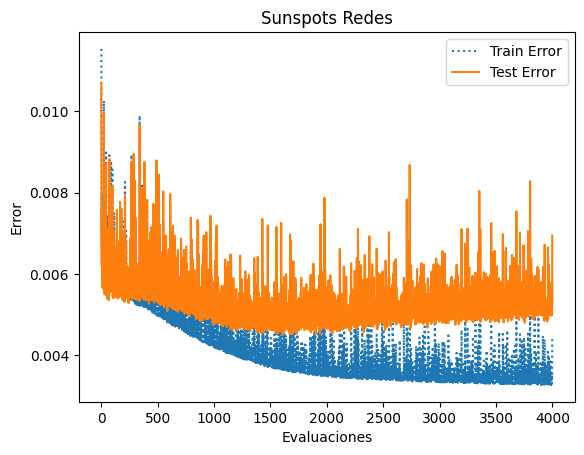

In [ ]:
# Sunspots redes

evaluaciones = 4000

regr, X_train, y_train, X_test, y_test = sunspots_redes()
e_train, _, e_test = entrenar_red(regr, evaluaciones, X_train, y_train, X_test,
                                  y_test)

plt.plot(range(evaluaciones), e_train, label = 'train', linestyle = ':')
plt.plot(range(evaluaciones), e_test, label = 'test', linestyle = '-')
plt.title('Sunspots Redes')
plt.xlabel('Evaluaciones')
plt.ylabel('Error')
plt.legend(['Train Error', 'Test Error'])

Ikeda

In [ ]:
import random

def ikeda():
  df = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/TP2/'
                   'Datasets/ikeda.data', header = None,
                   delim_whitespace = True)
  X = df[df.columns[:-1]]
  y = df[df.columns[-1]]
  X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8,
                                                    random_state = 0)

  test = 2000
  dataset = 4800

  skip = sorted(random.sample(range(dataset), dataset - test))
  df = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/TP2/'
                   'Datasets/ikeda.test', header = None, skiprows = skip,
                   delim_whitespace = True)
  X_test = df[df.columns[:-1]]
  y_test = df[df.columns[-1]]

  return X_train, y_train, X_val, y_val, X_test, y_test

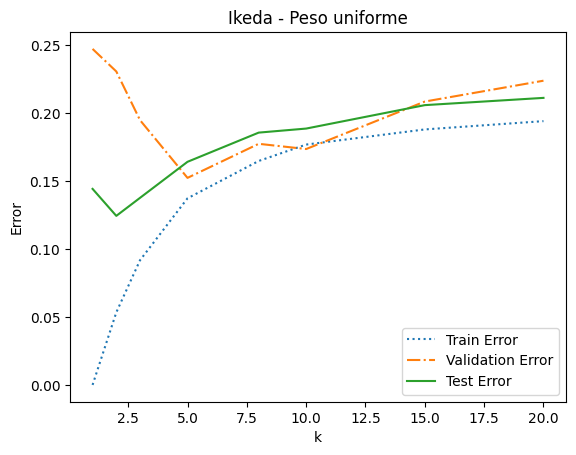

Text(0.5, 1.0, 'Ikeda - Pesado inverso a la distancia')

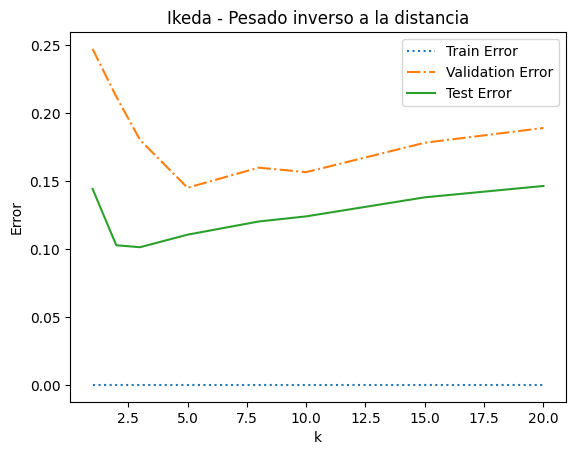

In [ ]:
# Ikeda

ks = [1,2,3,5,8,10,15,20]
w = 'distance'

X_train, y_train, X_val, y_val, X_test, y_test = ikeda()
_, e_train_u, e_val_u, e_test_u = entrenar_knn(X_train, y_train, X_val, y_val,
                                               X_test, y_test, ks,
                                               isClassif = False)

_, e_train_d, e_val_d, e_test_d = entrenar_knn(X_train, y_train, X_val, y_val,
                                               X_test, y_test, ks, w,
                                               isClassif = False)

# Grafico errores pesos uniforme
plt.plot(ks, e_train_u, linestyle = ':')
plt.plot(ks, e_val_u, linestyle = '-.')
plt.plot(ks, e_test_u, linestyle = '-')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend(['Train Error', 'Validation Error', 'Test Error'])
plt.title('Ikeda - Peso uniforme')
plt.show()

# Grafico errores pesado inverso a la distancia
plt.plot(ks, e_train_d, linestyle = ':')
plt.plot(ks, e_val_d, linestyle = '-.')
plt.plot(ks, e_test_d, linestyle = '-')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend(['Train Error', 'Validation Error', 'Test Error'])
plt.title('Ikeda - Pesado inverso a la distancia')

In [ ]:
def ikeda_redes():
  eta = 0.01      # Learning rate
  alfa = 0.9      # Momentum
  epocas = 50     # Número de épocas que entrena cada vez
  N2 = 30         # Cantidad de neuronas en la capa intermedia

  df = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/TP2/'
                   'Datasets/ikeda.data', header = None,
                   delim_whitespace = True)
  X = df[df.columns[:-1]]
  y = df[df.columns[-1]]
  X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8,
                                                    random_state = 0)

  test = 2000
  dataset = 4800

  skip = sorted(random.sample(range(dataset), dataset - test))
  df = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/TP2/'
                   'Datasets/ikeda.test', header = None, skiprows = skip,
                   delim_whitespace = True)
  X_test = df[df.columns[:-1]]
  y_test = df[df.columns[-1]]

  regr = MLPRegressor(hidden_layer_sizes = (N2,), activation = 'logistic',
                      solver = 'sgd', alpha = 0.0, batch_size = 1,
                      learning_rate = 'constant', learning_rate_init = eta,
                      momentum = alfa, nesterovs_momentum = False, tol = 0.0,
                      warm_start = True, max_iter = epocas)

  return regr, X_train, y_train, X_val, y_val, X_test, y_test

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


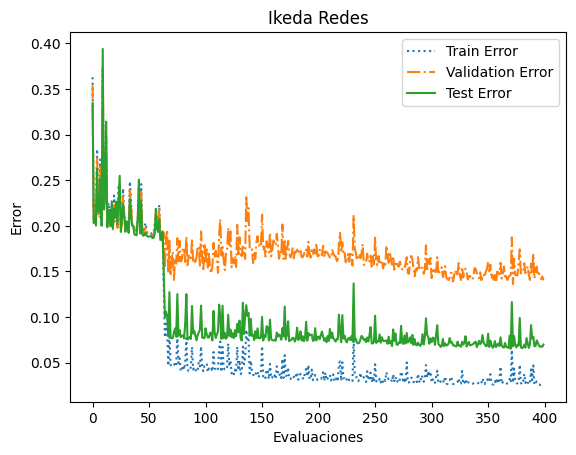

In [ ]:
evaluaciones = 400

regr, X_train, y_train, X_val, y_val, X_test, y_test = ikeda_redes()
e_train, e_val, e_test = entrenar_red(regr, evaluaciones, X_train, y_train,
                                      X_test, y_test, X_val, y_val)

plt.plot(range(evaluaciones), e_train, label = 'train', linestyle = ':')
plt.plot(range(evaluaciones), e_val, label = 'validacion',linestyle = '-.')
plt.plot(range(evaluaciones), e_test, label = 'test', linestyle = '-')
plt.title('Ikeda Redes')
plt.xlabel('Evaluaciones')
plt.ylabel('Error')
plt.legend(['Train Error', 'Validation Error', 'Test Error'])

Para el problema de Sunspots, se obtuvieron errores muy bajos, tanto con pesos uniformes como con el pesado inverso a la distancia. Usando pesos uniformes, se observa algo de sobreajuste para valores chicos de k, pero a partir de 5 vecinos empieza a disminuir. A pesar del bajo error obtenido, las redes neuronales dieron resultados ligeramente mejores.

En el caso de Ikeda, ocurre algo similar al problema anterior, excepto que en este caso los errores obtenidos fueron algo elevados, de valores entre 0.15 y 0.2 para pesos uniformes, y alcanzando mínimos cercanos a 0.1 para pesado inverso a la distancia. Nuevamente las redes neuronales resultaron mejores.

En ambos problemas, usando pesado inverso a la distancia se obtuvo sobreajuste, dando error de train igual a 0 para todo k elegido.

**Ejercicio e)**

In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier

# Entrena clasificadores con los vecinos más cercanos, para una lista de radios,
# midiendo el error de validación al terminar ese paso de entrenamiento.
# Devuelve el mejor clasificador
def entrenar_radius(X_train, y_train, X_val, y_val, ds):
  error_val = []
  clasificadores = []

  for d in ds:
    clf = RadiusNeighborsClassifier(radius = d, outlier_label = 'most_frequent')
    clf.fit(X_train, y_train)

    y_val_pred = clf.predict(X_val)
    e_val = zero_one_loss(y_val, y_val_pred)

    error_val += [e_val]
    clasificadores += [copy.deepcopy(clf)]

  # Guardo el índice en que se encuentra el menor error de validación
  i = error_val.index(min(error_val))
  # Y lo uso para elegir el mejor clasificador
  best_clasif = clasificadores[i]

  return best_clasif

In [ ]:
from scipy.spatial.distance import pdist

# Dada una lista de conjuntos de entrenamiento y un conjunto de test, entrena
# clasificadores con los vecinos más cercanos y calcula los promedios de los
# errores de train y de test
def errorsRadius(dfs, df_test):
  X_test = df_test[df_test.columns[:-1]]
  y_test = df_test[df_test.columns[-1]]

  trainErrorRates = []
  testErrorRates = []

  for df in dfs:
    X = df[df.columns[:-1]]
    y = df[df.columns[-1]]
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8,
                                                      random_state = 0)

    # Calculo las distancias entre los puntos del dataframe
    dists = pdist(X_train, metric = 'euclidean')
    minDist = np.max(dists)
    maxDist = np.min(dists)

    # Elijo 15 valores equispaciados dentro del rango de la mínima y máxima
    # distancia
    ds = np.linspace(minDist, maxDist, num = 15)

    clf = entrenar_radius(X_train, y_train, X_val, y_val, ds)
    trainErrorRates += [zero_one_loss(y_train, clf.predict(X_train))]
    testErrorRates += [zero_one_loss(y_test, clf.predict(X_test))]

  trainErrorMean = mean(trainErrorRates)
  testErrorMean = mean(testErrorRates)
  return trainErrorMean, testErrorMean

In [ ]:
# Calculo los errores de los clasificadores con los vecinos más cercanos

# Diagonal

# d = 2
e_train1_Diag_Radius, e_test1_Diag_Radius = errorsRadius(df1_Diag, test1_Diag)
# d = 4
e_train2_Diag_Radius, e_test2_Diag_Radius = errorsRadius(df2_Diag, test2_Diag)
# d = 8
e_train3_Diag_Radius, e_test3_Diag_Radius = errorsRadius(df3_Diag, test3_Diag)
# d = 16
e_train4_Diag_Radius, e_test4_Diag_Radius = errorsRadius(df4_Diag, test4_Diag)
# d = 32
e_train5_Diag_Radius, e_test5_Diag_Radius = errorsRadius(df5_Diag, test5_Diag)

# Y los agrupo en listas
e_train_Diag_Radius = [e_train1_Diag_Radius, e_train2_Diag_Radius,
                       e_train3_Diag_Radius, e_train4_Diag_Radius,
                       e_train5_Diag_Radius]
e_test_Diag_Radius = [e_test1_Diag_Radius, e_test2_Diag_Radius,
                      e_test3_Diag_Radius, e_test4_Diag_Radius,
                      e_test5_Diag_Radius]

# Paralelo

# d = 2
e_train1_Paral_Radius, e_test1_Paral_Radius = errorsRadius(df1_Paral,
                                                           test1_Paral)
# d = 4
e_train2_Paral_Radius, e_test2_Paral_Radius = errorsRadius(df2_Paral,
                                                           test2_Paral)
# d = 8
e_train3_Paral_Radius, e_test3_Paral_Radius = errorsRadius(df3_Paral,
                                                           test3_Paral)
# d = 16
e_train4_Paral_Radius, e_test4_Paral_Radius = errorsRadius(df4_Paral,
                                                           test4_Paral)
# d = 32
e_train5_Paral_Radius, e_test5_Paral_Radius = errorsRadius(df5_Paral,
                                                           test5_Paral)

# Y los agrupo en listas
e_train_Paral_Radius = [e_train1_Paral_Radius, e_train2_Paral_Radius,
                        e_train3_Paral_Radius, e_train4_Paral_Radius,
                        e_train5_Paral_Radius]
e_test_Paral_Radius = [e_test1_Paral_Radius, e_test2_Paral_Radius,
                       e_test3_Paral_Radius, e_test4_Paral_Radius,
                       e_test5_Paral_Radius]

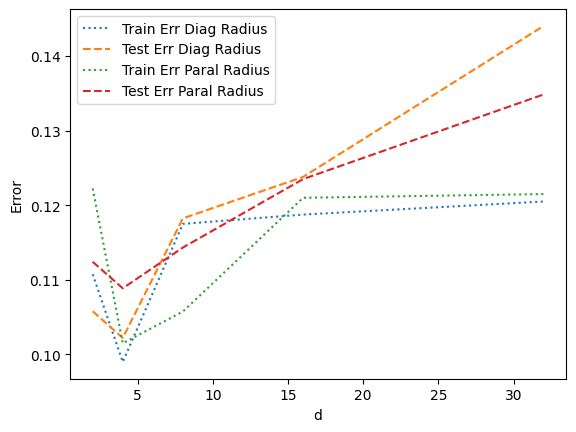

In [ ]:
# Grafico

d = [2, 4, 8, 16, 32]

# Diagonal
plt.plot(d, e_train_Diag_Radius, linestyle = ':')
plt.plot(d, e_test_Diag_Radius, linestyle = '--')

# Paralelo
plt.plot(d, e_train_Paral_Radius, linestyle = ':')
plt.plot(d, e_test_Paral_Radius, linestyle = '--')

# Etiquetas
plt.xlabel('d')
plt.ylabel('Error')
plt.legend(['Train Err Diag Radius', 'Test Err Diag Radius',
            'Train Err Paral Radius', 'Test Err Paral Radius'])

Se puede observar que el problema se ve afectado por la dimensionalidad, ya que al aumentar la cantidad de dimensiones aumenta el error.

Para este problema se obtuvieron errores de test similares a los obtenidos en el punto c), pero esta vez los errores de train no dieron 0, con lo que se puede decir que no hay sobreajuste.